# **Breast Cancer Classification with Neural Network :**

# Importing the Dependents :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.random.set_seed(3) # random seed is just like our random state
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, ReLU, PReLU,ELU,ReLU,Flatten

# Data Collection & Preprocessing :

In [2]:
breast_cancer_dataset = data.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
data_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [90]:
data_frame.to_csv('data_frame.csv')

In [5]:
# Adding a target column to data frame  :
data_frame['label'] = pd.DataFrame(breast_cancer_dataset.target)

In [6]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
data_frame.duplicated().sum()

0

In [9]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
# Checking for the distribution of Target Variable
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

In [11]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Seperating the features and target

In [12]:
x = data_frame.drop(columns = 'label',axis = 1)
y = data_frame['label']

In [13]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Splitting the data into training and testing :

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
# Standardizing the Data :

from sklearn.preprocessing import StandardScaler


In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [17]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (455, 30) (114, 30)


# **Building a Neural Network :**

In [18]:
# Setting up the layers of our Neural Network :

model = Sequential([
    Flatten(input_shape = (30,)), # Converting data in single array
    Dense(20,activation='relu'),
    Dense(10,activation = 'relu'),
    Dense(2, activation = 'sigmoid')])

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',min_delta=0.001,patience=10)

In [22]:
# Training the Neural Network

history = model.fit(x_train,y_train, validation_split=0.30,epochs=40, callbacks= early_stopping)

Epoch 1/40
10/10 [==============================] - 1s 31ms/step - loss: 0.7935 - accuracy: 0.4151 - val_loss: 0.7024 - val_accuracy: 0.5401
Epoch 2/40
10/10 [==============================] - 0s 8ms/step - loss: 0.6415 - accuracy: 0.5881 - val_loss: 0.5784 - val_accuracy: 0.6569
Epoch 3/40
10/10 [==============================] - 0s 8ms/step - loss: 0.5354 - accuracy: 0.7390 - val_loss: 0.4863 - val_accuracy: 0.7518
Epoch 4/40
10/10 [==============================] - 0s 7ms/step - loss: 0.4537 - accuracy: 0.8145 - val_loss: 0.4099 - val_accuracy: 0.8248
Epoch 5/40
10/10 [==============================] - 0s 6ms/step - loss: 0.3909 - accuracy: 0.8522 - val_loss: 0.3466 - val_accuracy: 0.8832
Epoch 6/40
10/10 [==============================] - 0s 8ms/step - loss: 0.3365 - accuracy: 0.8931 - val_loss: 0.2962 - val_accuracy: 0.9124
Epoch 7/40
10/10 [==============================] - 0s 9ms/step - loss: 0.2907 - accuracy: 0.9119 - val_loss: 0.2560 - val_accuracy: 0.9270
Epoch 8/40
10/10 [=

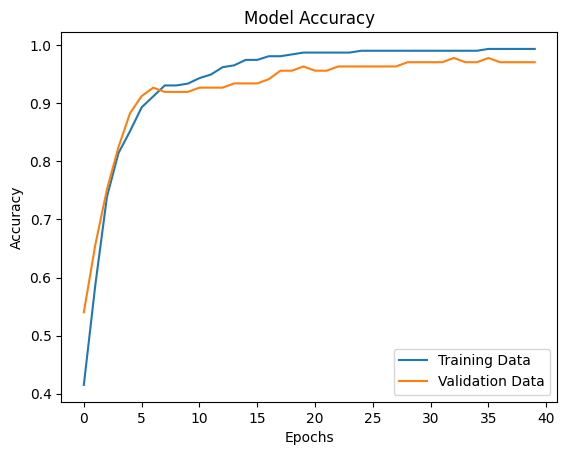

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Data','Validation Data'])
plt.show()

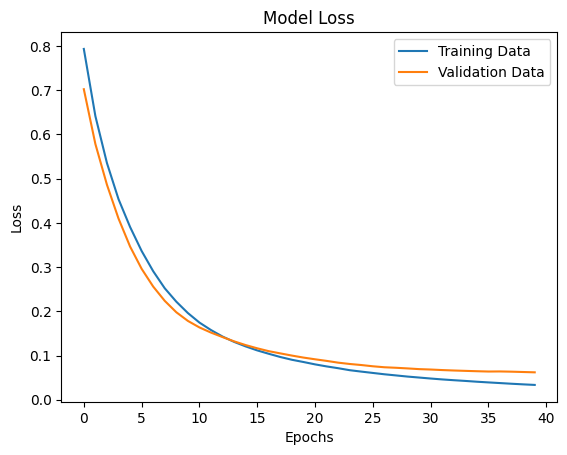

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Data','Validation Data'])
plt.show()

# Accuracy of the model from test data :

In [25]:
loss, accuracy = model.evaluate(x_test,y_test)
print(accuracy*100)

4/4 [==============================] - 0s 4ms/step - loss: 0.1011 - accuracy: 0.9649
96.49122953414917


# **Building a Predictive System :**

In [26]:
print(x_test.shape)
print(x_test[0])

(114, 30)
[-0.08700339 -1.47192915 -0.10537391 -0.21479674  2.05627941 -0.18759821
  0.04345969  0.3431473   0.48693221  0.20971492  0.41483725  2.38110688
  0.53816721  0.01895993  0.95128447  0.31678369  0.28189043  2.21465008
 -0.39276605  0.44485916 -0.3863489  -1.69650664 -0.42190004 -0.44557481
  0.23041821 -0.75521902 -0.60192371 -0.26629174 -1.09776353 -0.65597459]


In [27]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [28]:
print(y_pred.shape)
print(y_pred[0]*100)

(114, 2)
[47.86521 75.92391]


* Here "0.30064306" is the probabilty of our data being 0.
* And "0.7217277" is the probability of our data being 1.

In [29]:
x_test

array([[-0.08700339, -1.47192915, -0.10537391, ..., -0.26629174,
        -1.09776353, -0.65597459],
       [ 0.19989092,  0.03577342,  0.1706179 , ...,  0.44844054,
         0.06066588,  0.02108157],
       [-1.28858427, -0.21847659, -1.30667757, ..., -1.41981535,
         0.19788632, -0.31050377],
       ...,
       [ 0.67523542,  0.61546345,  0.70329853, ...,  1.36221218,
         1.000987  ,  0.62759948],
       [ 0.20832899,  1.5866985 ,  0.10942329, ..., -1.35965118,
        -1.95719681, -1.62740299],
       [ 0.78774299,  0.03068842,  0.84293725, ...,  2.03773974,
         0.27299646,  0.34822356]])

In [30]:
y_pred

array([[4.78652120e-01, 7.59239137e-01],
       [4.06192094e-01, 8.11817706e-01],
       [4.21813913e-02, 9.98127222e-01],
       [9.99997079e-01, 6.29824295e-04],
       [2.99419045e-01, 9.07799482e-01],
       [9.99117494e-01, 1.65682118e-02],
       [1.93128824e-01, 9.54011261e-01],
       [2.27037854e-02, 9.99705732e-01],
       [4.05324772e-02, 9.95583296e-01],
       [8.20632800e-02, 9.97208953e-01],
       [7.11147308e-01, 5.35981953e-01],
       [2.42893293e-01, 9.66312289e-01],
       [2.89797187e-01, 8.92480791e-01],
       [2.04389900e-01, 9.15910602e-01],
       [4.52713743e-02, 9.95278120e-01],
       [9.12245750e-01, 1.97088957e-01],
       [4.00929898e-02, 9.96324837e-01],
       [5.24713658e-02, 9.98025775e-01],
       [1.34197116e-01, 9.95474577e-01],
       [9.99323547e-01, 1.43709304e-02],
       [2.35930175e-01, 9.47282135e-01],
       [3.05404887e-02, 9.99387920e-01],
       [3.85621451e-02, 9.97381687e-01],
       [3.98776457e-02, 9.99647081e-01],
       [1.609506

* **model.predict gives us the prediction probability of each class for the data point :**

In [31]:
# Argmax Function : It gives us the Maximum values index number

my_list = [0.56,0.35,0.80]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.56, 0.35, 0.8]
2


In [32]:
 # Converting the prediction probabilty to class labels (0 or 1) :

 y_pred_labels = [np.argmax(i) for i in y_pred]
 print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


In [33]:
input_data = (0,17.99,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)

# changing the input data to numpy array
input_as_numpy = np.asarray(input_data)

# reshape the numpy as we are predicting for one data point
input_data_reshape = input_as_numpy.reshape(1,-1)

# Standardizing the input data
input_data_std = sc.transform(input_data_reshape)

prediction = model.predict(input_data_std)
print(prediction)

predcition_label = [np.argmax(prediction)]
print(predcition_label)

if(predcition_label[0] == 0):
  print("The tumor is Malignant")
else:
  print("The Tumor is Benign")

1/1 [==============================] - 0s 28ms/step
[[0.9995185  0.00935566]]
[0]
The tumor is Malignant


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
